####Disclaimer: This model file should only be used for referencing purposes

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils.class_weight import compute_sample_weight
import pickle





In [172]:
data = pd.read_csv('Stroke prediction_ANN.csv')

In [173]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [174]:
data.drop('id', axis = 1, inplace = True)

In [175]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<Axes: xlabel='avg_glucose_level'>

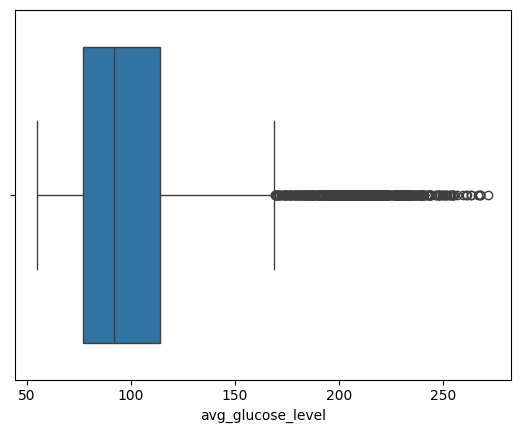

In [176]:
sns.boxplot(data['avg_glucose_level'], orient = 'h')

<Axes: xlabel='bmi'>

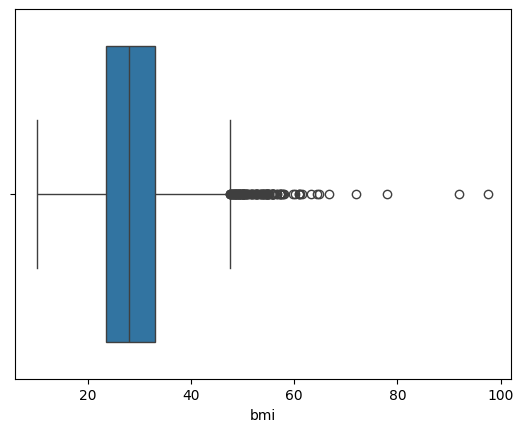

In [177]:
sns.boxplot(data['bmi'], orient = 'h')

In [178]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())

In [187]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)


IQR = Q3 - Q1



lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [188]:
data.loc[data["bmi"]>upper_bound,"bmi"] = data.bmi.median()

<Axes: xlabel='bmi'>

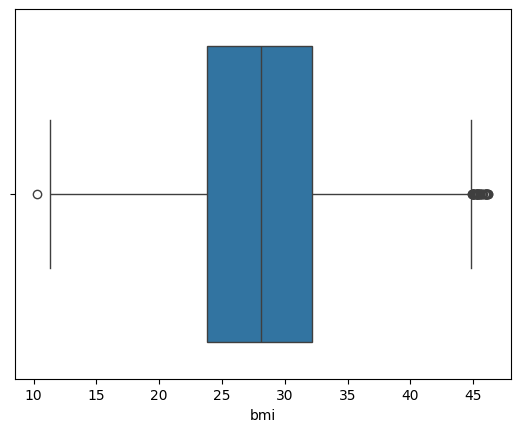

In [189]:
sns.boxplot(data['bmi'], orient = 'h')

In [190]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [182]:
data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [185]:
data.loc[data['gender']=='Other','gender'] = 'Female'

In [191]:
data.gender.unique()

array(['Male', 'Female'], dtype=object)

In [192]:
data.gender.value_counts()

gender
Female    2995
Male      2115
Name: count, dtype: int64

In [193]:
data.bmi.median()

28.1

In [194]:
data.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [195]:
data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

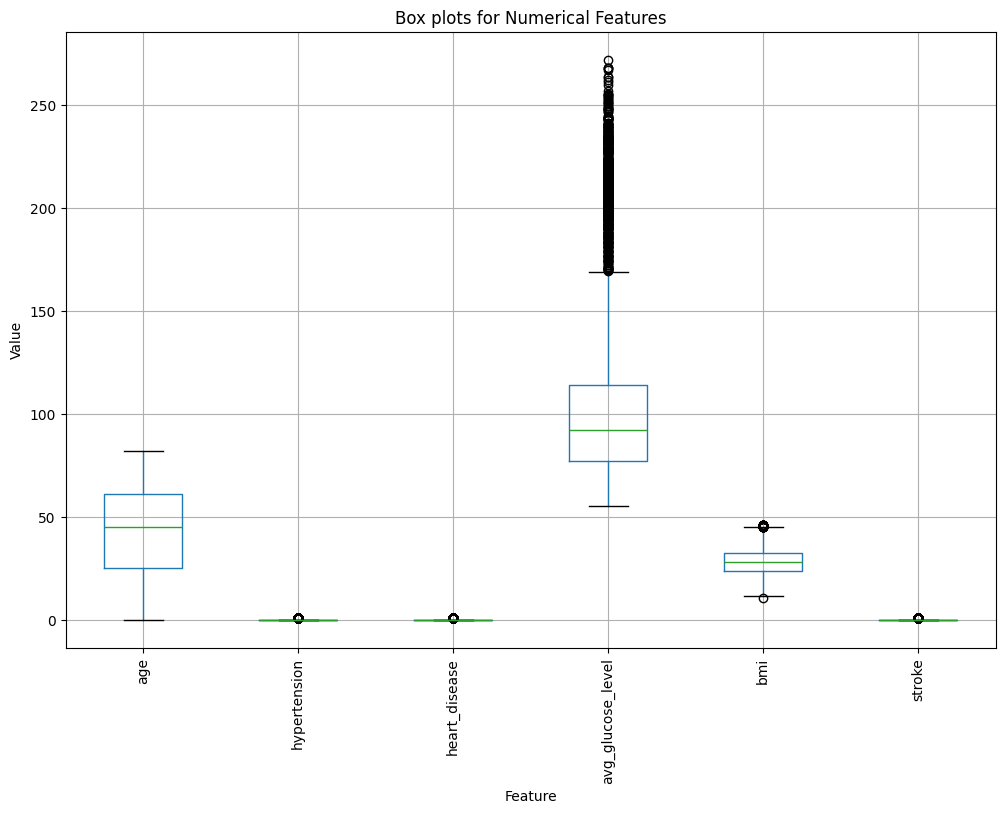

In [196]:
numerical_cols = data.select_dtypes(include=['int', 'float']).columns

# Create box plots for all numerical features
plt.figure(figsize=(12, 8))
data[numerical_cols].boxplot()
plt.xticks(rotation=90)
plt.title('Box plots for Numerical Features')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()

In [197]:
ohe = OneHotEncoder()

In [198]:
gender = pd.get_dummies(data.gender,dtype=int)

In [199]:
work_type = pd.get_dummies(data.work_type, dtype = int)

In [200]:
smoking_status = pd.get_dummies(data.smoking_status, dtype = int)

In [201]:
Residence_type = pd.get_dummies(data.Residence_type, dtype = int)

In [202]:
data = pd.concat([gender, work_type, smoking_status, Residence_type, data],axis=1) 

In [203]:
data

,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,...,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,0,0,1,0,0,0,1,0,...,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,0,0,0,0,1,0,0,0,1,...,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,0,1,0,0,1,0,0,0,0,1,...,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1,0,0,0,1,0,0,0,0,0,...,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1,0,0,0,0,1,0,0,0,1,...,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,0,0,0,0,1,...,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,1,0,0,0,0,1,0,0,0,1,...,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,1,0,0,0,0,1,0,0,0,1,...,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,0,1,0,0,1,0,0,0,1,0,...,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Female             5110 non-null   int32  
 1   Male               5110 non-null   int32  
 2   Govt_job           5110 non-null   int32  
 3   Never_worked       5110 non-null   int32  
 4   Private            5110 non-null   int32  
 5   Self-employed      5110 non-null   int32  
 6   children           5110 non-null   int32  
 7   Unknown            5110 non-null   int32  
 8   formerly smoked    5110 non-null   int32  
 9   never smoked       5110 non-null   int32  
 10  smokes             5110 non-null   int32  
 11  Rural              5110 non-null   int32  
 12  Urban              5110 non-null   int32  
 13  age                5110 non-null   float64
 14  hypertension       5110 non-null   int64  
 15  heart_disease      5110 non-null   int64  
 16  ever_married       5110 

In [204]:
data.drop(['gender','work_type','Residence_type','smoking_status'],axis = 1, inplace = True)

In [205]:
data

,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,Rural,Urban,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,0,1,0,0,0,1,67.0,0,1,Yes,228.69,36.6,1
1,1,0,0,0,0,1,0,0,0,1,0,1,0,61.0,0,0,Yes,202.21,28.1,1
2,0,1,0,0,1,0,0,0,0,1,0,1,0,80.0,0,1,Yes,105.92,32.5,1
3,1,0,0,0,1,0,0,0,0,0,1,0,1,49.0,0,0,Yes,171.23,34.4,1
4,1,0,0,0,0,1,0,0,0,1,0,1,0,79.0,1,0,Yes,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,0,0,0,0,1,0,0,1,80.0,1,0,Yes,83.75,28.1,0
5106,1,0,0,0,0,1,0,0,0,1,0,0,1,81.0,0,0,Yes,125.20,40.0,0
5107,1,0,0,0,0,1,0,0,0,1,0,1,0,35.0,0,0,Yes,82.99,30.6,0
5108,0,1,0,0,1,0,0,0,1,0,0,1,0,51.0,0,0,Yes,166.29,25.6,0


In [206]:
le = LabelEncoder()

In [207]:
data["ever_married"] =  le.fit_transform(data.ever_married)

In [208]:
data

,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,Rural,Urban,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,0,1,0,0,0,1,67.0,0,1,1,228.69,36.6,1
1,1,0,0,0,0,1,0,0,0,1,0,1,0,61.0,0,0,1,202.21,28.1,1
2,0,1,0,0,1,0,0,0,0,1,0,1,0,80.0,0,1,1,105.92,32.5,1
3,1,0,0,0,1,0,0,0,0,0,1,0,1,49.0,0,0,1,171.23,34.4,1
4,1,0,0,0,0,1,0,0,0,1,0,1,0,79.0,1,0,1,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,0,0,0,0,1,0,0,1,80.0,1,0,1,83.75,28.1,0
5106,1,0,0,0,0,1,0,0,0,1,0,0,1,81.0,0,0,1,125.20,40.0,0
5107,1,0,0,0,0,1,0,0,0,1,0,1,0,35.0,0,0,1,82.99,30.6,0
5108,0,1,0,0,1,0,0,0,1,0,0,1,0,51.0,0,0,1,166.29,25.6,0


In [209]:
scale = StandardScaler()

In [210]:
colsc = ['age', 'avg_glucose_level','bmi']

In [211]:
data[colsc] = scale.fit_transform(data[colsc])

In [212]:
data

,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,Rural,Urban,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,0,1,0,0,0,1,1.051434,0,1,1,2.706375,1.275259,1
1,1,0,0,0,0,1,0,0,0,1,0,1,0,0.786070,0,0,1,2.121559,-0.022164,1
2,0,1,0,0,1,0,0,0,0,1,0,1,0,1.626390,0,1,1,-0.005028,0.649443,1
3,1,0,0,0,1,0,0,0,0,0,1,0,1,0.255342,0,0,1,1.437358,0.939456,1
4,1,0,0,0,0,1,0,0,0,1,0,1,0,1.582163,1,0,1,1.501184,-0.647980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,0,0,0,0,1,0,0,1,1.626390,1,0,1,-0.494658,-0.022164,0
5106,1,0,0,0,0,1,0,0,0,1,0,0,1,1.670617,0,0,1,0.420775,1.794229,0
5107,1,0,0,0,0,1,0,0,0,1,0,1,0,-0.363842,0,0,1,-0.511443,0.359431,0
5108,0,1,0,0,1,0,0,0,1,0,0,1,0,0.343796,0,0,1,1.328257,-0.403759,0


In [213]:
X = data.drop('stroke', axis = 1)
y = data.stroke

In [214]:
X

,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,Rural,Urban,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
0,0,1,0,0,1,0,0,0,1,0,0,0,1,1.051434,0,1,1,2.706375,1.275259
1,1,0,0,0,0,1,0,0,0,1,0,1,0,0.786070,0,0,1,2.121559,-0.022164
2,0,1,0,0,1,0,0,0,0,1,0,1,0,1.626390,0,1,1,-0.005028,0.649443
3,1,0,0,0,1,0,0,0,0,0,1,0,1,0.255342,0,0,1,1.437358,0.939456
4,1,0,0,0,0,1,0,0,0,1,0,1,0,1.582163,1,0,1,1.501184,-0.647980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,0,0,0,0,1,0,0,1,1.626390,1,0,1,-0.494658,-0.022164
5106,1,0,0,0,0,1,0,0,0,1,0,0,1,1.670617,0,0,1,0.420775,1.794229
5107,1,0,0,0,0,1,0,0,0,1,0,1,0,-0.363842,0,0,1,-0.511443,0.359431
5108,0,1,0,0,1,0,0,0,1,0,0,1,0,0.343796,0,0,1,1.328257,-0.403759


In [215]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [216]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [217]:
MLP_model = MLPClassifier( hidden_layer_sizes=(60,4),learning_rate_init=0.1,activation='relu',max_iter=100,random_state=2,solver='adam') 
MLP_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(60, 4), learning_rate_init=0.1, max_iter=100,
              random_state=2)

In [218]:
y_pred = MLP_model.predict(X_test)

In [219]:
accuracy_score(y_test, y_pred)

0.9419439008480104

In [221]:
f1_score(y_test, y_pred)

0.0

In [222]:
confusion_matrix(y_test, y_pred)

array([[1444,    0],
       [  89,    0]], dtype=int64)

In [223]:
pd.crosstab(y_test, y_pred)

col_0,0
stroke,
0,1444
1,89


In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



In [225]:
sm = SMOTE()

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [226]:
Counter(y_train)
Counter(y_train_smote)

Counter({0: 3417, 1: 3417})

In [227]:
MLP_model_2 = MLPClassifier(hidden_layer_sizes=(60,4),learning_rate_init= 0.001,activation='relu',max_iter=100,random_state=42,solver='adam') 
MLP_model_2.fit(X_train_smote, y_train_smote)

MLPClassifier(hidden_layer_sizes=(60, 4), max_iter=100, random_state=42)

In [228]:
y_predict = MLP_model_2.predict(X_test)

In [229]:
accuracy_score(y_test, y_predict)

0.908675799086758

In [231]:
f1_score(y_test, y_predict)

0.16666666666666666

In [232]:
pd.crosstab(y_test, y_predict)

col_0,0,1
stroke,,
0,1379,65
1,75,14


In [233]:
confusion_matrix(y_test, y_predict)

array([[1379,   65],
       [  75,   14]], dtype=int64)

In [234]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.18      0.16      0.17        89

    accuracy                           0.91      1533
   macro avg       0.56      0.56      0.56      1533
weighted avg       0.90      0.91      0.91      1533



In [235]:
scores = cross_val_score(MLP_model_2,X_test,y_test, cv=5,scoring='accuracy')
print("Cross-Validation Scores:",scores)
print("Cross validation Mean Score:",scores.mean())
print("Std :",scores.std())

Cross-Validation Scores: [0.94136808 0.94136808 0.94136808 0.94444444 0.94117647]
Cross validation Mean Score: 0.9419450299120735
Std : 0.0012519086513417183


In [236]:
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 30,), (100,)],
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate_init': [0.001, 0.01, 0.1],
}


In [237]:
mlp = MLPClassifier(max_iter=200, random_state=42)

In [238]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
clf.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50,), (50, 30), (100,)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['sgd', 'adam']},
             scoring='f1')

In [240]:
print(clf.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 30), 'learning_rate_init': 0.01, 'solver': 'adam'}


In [241]:
MLP_grid = MLPClassifier(activation = 'relu', alpha = 0.0001, hidden_layer_sizes= (50,30), learning_rate_init= 0.01, solver= 'adam')
MLP_grid.fit(X_train_smote, y_train_smote)

MLPClassifier(hidden_layer_sizes=(50, 30), learning_rate_init=0.01)

In [242]:
y_p = MLP_grid.predict(X_test)

In [243]:
accuracy_score(y_test,y_p)

0.9047619047619048

In [244]:
f1_score(y_test,y_p)

0.1797752808988764

In [245]:
pd.crosstab(y_test, y_p)

col_0,0,1
stroke,,
0,1371,73
1,73,16


In [246]:
confusion_matrix(y_test, y_p)

array([[1371,   73],
       [  73,   16]], dtype=int64)

In [247]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.18      0.18      0.18        89

    accuracy                           0.90      1533
   macro avg       0.56      0.56      0.56      1533
weighted avg       0.90      0.90      0.90      1533



In [250]:
#Please create your own pickle file here

pickle.dump(MLP_grid,open('modelannMLP.pkl','wb'))